<h1>Compute 95% Confidence Interval for SIR Predictions</h1>

<p>In this tutorial we are going how to insert uncertainties in our preditctions. For achive it we are going to compute a non-parametric interval around our predictions. The interval is created using a techinique called bootstrap.</p>

<p>It's easy to compute confidence interval using the class SIR_EDO. This class now have a method calling fit_predictCI that returns a pandas data frame, with all you need to put uncertainties around your predictions. This methods take advantage of multprocessing system and can be distributed across your system.</p>

In [1]:
import multiprocessing as mp
import sys
#add the path were the models are
sys.path.append("../main/")
import pandas as pd
import numpy as np
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from itertools import repeat
import time
from modelos import SIR_EDO
#set default theme for plts
theme_set(theme_linedraw())

In [2]:
data = pd.read_csv("../data/estados.csv")
#Select only Sao Paulo
sp = data[data["state"] == "SP"]
#Remove missing values to not crash the intervals
sp = sp.dropna()
#create a series with the cummulative number of cases
y = sp["TOTAL"]

#Give the number of days since the day of first case confirmed
x = range(1,len(sp["TOTAL"]) + 1)

In [3]:
#start model
model = SIR_EDO(50000000)

In [4]:
model.fit(x = x, y = y)

In [5]:
resultdf = model.predictCI(x =x, y = y, ndays = 30, start = "2020-02-25",  bootstrap = 5, n_jobs = 8)

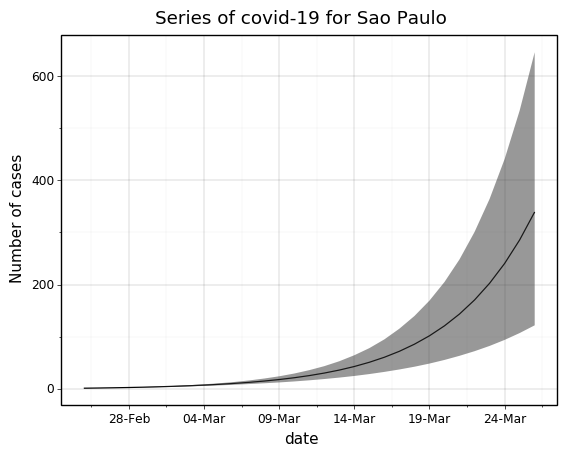

<ggplot: (8771645039806)>

In [6]:
#plot graph using ggplot
(ggplot(resultdf) + 
    geom_line(aes(x = "date", y = "predicted")) +
    geom_ribbon(aes(x = "date", ymin = "lb", ymax = "ub"), alpha = 0.5) +
    scale_x_datetime(breaks = date_breaks('5 days'), labels=date_format('%d-%b')) +
    ggtitle("Series of covid-19 for Sao Paulo") +
    ylab("Number of cases"))